In [1]:
import numpy as np
from skimage import filters
from skimage.filters import try_all_threshold
from skimage.transform import resize
import os
import matplotlib.pyplot as plt
import cv2
from utils.image_transform import crop_center_square

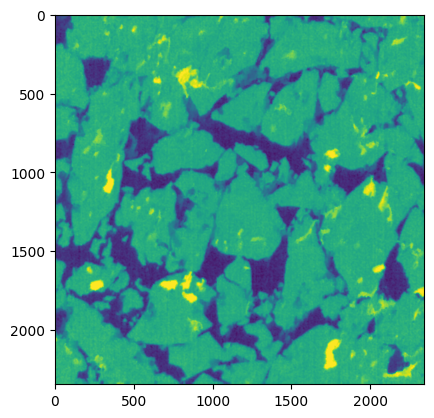

In [2]:
img = cv2.imread('E:/polar/Flight9/ir_all/20220718_145318_1104.png', 0)
plt.imshow(img)
#img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img = crop_center_square(img)
img = resize(img, (2345,2345))
plt.imshow(img)

plt.imsave('E:/polar/code/ponds_extended_data/edge_masks/4_orig.png', img, cmap='cividis')

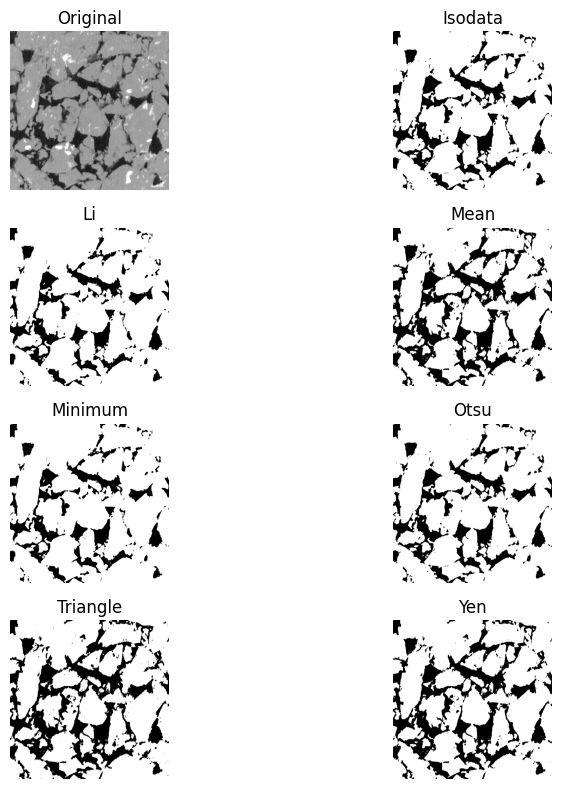

In [3]:
fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

In [5]:
def create_mask(image, threshold='mean'):
    """
    Thresholds image and denoises with Scharr filter

    Parameters:
    -----------
        image : np.array
            source image for edge map
        threshold : str
            threshold to apply

    """
    if threshold == 'otsu':
        thrs = filters.threshold_otsu(image)
    elif threshold == 'mean':
        thrs = filters.threshold_mean(image)
    elif threshold == 'iso':
        thrs = filters.threshold_isodata(image)
    
    binary = image > thrs

    img_blurred = filters.scharr(binary)

    plt.imshow(img_blurred, cmap='Greys')
    plt.imsave('E:/polar/code/ponds_extended_data/edge_masks/4.png', img_blurred, cmap='Greys')

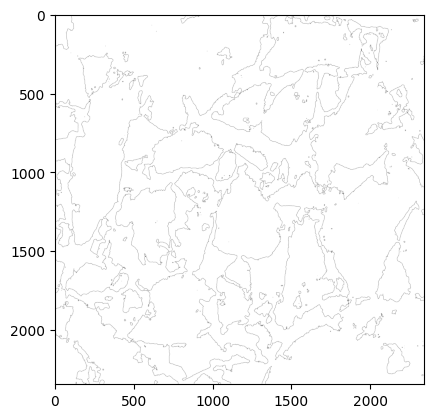

In [6]:
create_mask(img, 'mean')